# **Import Libraries**


In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import copy

In [340]:
data = pd.read_csv("/content/Breast_Cancer.csv")
df = copy.deepcopy(data)

# **Remove Null**

In [341]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['Unnamed: 32'],axis=1,inplace=True)

# **Encoding**

In [342]:
df['diagnosis']=[1  if i== 'M'  else 0  for i in df['diagnosis']]

# **Split Data**

In [343]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [344]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=42)



# **Scaling**

In [345]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# **Logistic Regression**

In [346]:
model_lg=LogisticRegression()
model_lg.fit(x_train,y_train)
y_lg_pred=model_lg.predict(x_test)

# **Evaluate Logistic Regression**

In [347]:
accuracy_lg=accuracy_score(y_lg_pred,y_test)
recall_lg=recall_score(y_lg_pred,y_test)
precision_lg=precision_score(y_lg_pred,y_test)
f1_lg=f1_score(y_lg_pred,y_test)

# **Decision Tree**

In [348]:
model_dt=DecisionTreeClassifier()
model_dt=model_dt.fit(x_train,y_train)
y_dt_pred=model_dt.predict(x_test)

# **Evaluate Decesion Tree**

In [349]:
accuracy_dt=accuracy_score(y_dt_pred,y_test)
recall_dt=recall_score(y_dt_pred,y_test)
precision_dt=precision_score(y_dt_pred,y_test)
f1_dt=f1_score(y_dt_pred,y_test)


# **KNN**

In [350]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train, y_train)
y_knn_pred=model_knn.predict(x_test)

# **Evaluate KNN**

In [351]:
accuracy_knn=accuracy_score(y_knn_pred,y_test)
recall_knn=recall_score(y_knn_pred,y_test)
precision_knn=precision_score(y_knn_pred,y_test)
f1_knn=f1_score(y_knn_pred,y_test)

# **Chart Accuracy**

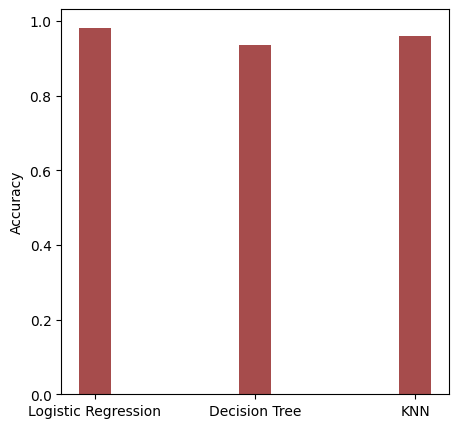

In [352]:
models =['Logistic Regression','Decision Tree','KNN']
acurracy =[accuracy_lg , accuracy_dt  , accuracy_knn]

fig = plt.figure(figsize = (5, 5))
plt.bar(models, acurracy, color ='maroon', width = 0.2,alpha=.7)
plt.ylabel("Accuracy")
plt.show()

# **Chart Recall**

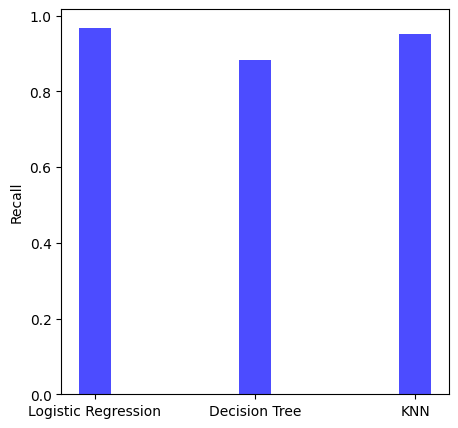

In [353]:
recall  =[recall_lg , recall_dt  , recall_knn]

fig2 = plt.figure(figsize = (5, 5))
plt.bar(models, recall, color ='blue', width = 0.2,alpha=.7)
plt.ylabel("Recall")
plt.show()

# **Chart Precision**

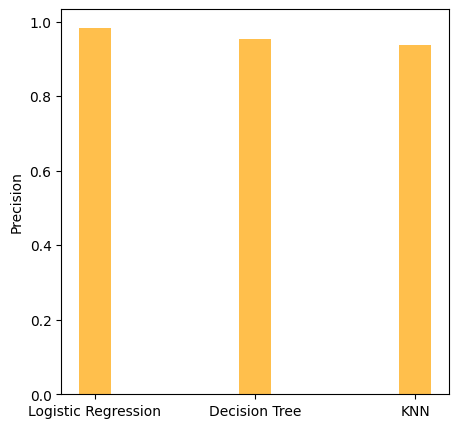

In [354]:
models =['Logistic Regression','Decision Tree','KNN']
precision =[precision_lg , precision_dt  , precision_knn]

fig = plt.figure(figsize = (5, 5))
plt.bar(models, precision, color ='orange', width = 0.2,alpha=.7)
plt.ylabel("Precision")
plt.show()

# **Chart F1 Score**

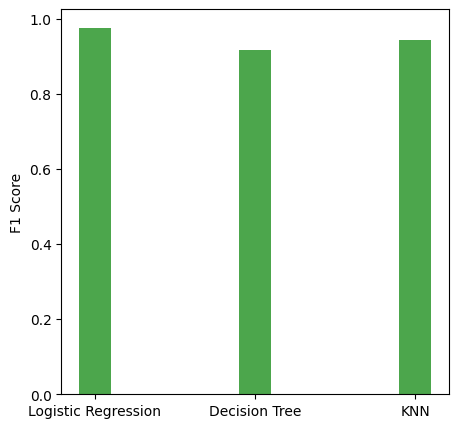

In [355]:
models =['Logistic Regression','Decision Tree','KNN']
f1_score =[f1_lg , f1_dt  , f1_knn]

fig = plt.figure(figsize = (5, 5))
plt.bar(models, f1_score, color ='green', width = 0.2,alpha=.7)
plt.ylabel("F1 Score")
plt.show()